### Step 1. Import the necessary libraries.

In [277]:
import pandas as pd

In [278]:
import numpy as np

In [279]:
import seaborn as sns 

In [280]:
import matplotlib.pyplot as plt

###  Step 2. Create the DataFrame with the following values.


In [281]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

In [282]:
pd.DataFrame(raw_data)

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


## Step 3. Assign it to a variable called regiment.(Don't forget to name each column).

In [283]:
regiment=pd.DataFrame(raw_data)

In [284]:
regiment = pd.DataFrame(raw_data, columns=['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])

In [285]:
regiment

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


### information about given dataset 

In [286]:
regiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   regiment       12 non-null     object
 1   company        12 non-null     object
 2   name           12 non-null     object
 3   preTestScore   12 non-null     int64 
 4   postTestScore  12 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 612.0+ bytes


In [287]:
regiment.describe()

,preTestScore,postTestScore
count,12.000000,12.000000
mean,11.083333,62.333333
std,12.324833,21.376850
min,2.000000,25.000000
25%,2.750000,57.000000
50%,3.500000,62.000000
75%,24.000000,70.000000
max,31.000000,94.000000


### No missing values 

In [288]:
regiment.isna().sum()

regiment         0
company          0
name             0
preTestScore     0
postTestScore    0
dtype: int64

### Step 4. What is the mean preTestScore from the regiment Nighthawks?


In [289]:
x= regiment.groupby(['regiment'])['preTestScore'].mean()
x

regiment
Dragoons      15.50
Nighthawks    15.25
Scouts         2.50
Name: preTestScore, dtype: float64

In [290]:
regiment[regiment['regiment']=='Nighthawks']['preTestScore'].mean()

15.25

### Step 5. Present general statistics by company.

In [291]:
x = regiment.groupby('company').describe()
x

preTestScore                                                      \
               count       mean        std  min   25%   50%    75%   max   
company                                                                    
1st              6.0   6.666667   8.524475  2.0  3.00   3.5   4.00  24.0   
2nd              6.0  15.500000  14.652645  2.0  2.25  13.5  29.25  31.0   

        postTestScore                                                       
                count       mean        std   min    25%   50%   75%   max  
company                                                                     
1st               6.0  57.666667  27.485754  25.0  34.25  66.0  70.0  94.0  
2nd               6.0  67.000000  14.057027  57.0  58.25  62.0  68.0  94.0

### Step 6. What is the mean each company's preTestScore?.

In [292]:
y= regiment.groupby(['company'])['preTestScore'].mean()
y

company
1st     6.666667
2nd    15.500000
Name: preTestScore, dtype: float64

### Step 7. Present the mean preTestScores grouped by regiment and company

In [293]:
x=regiment.groupby(['regiment','company'])['preTestScore'].mean()

In [294]:
x

regiment    company
Dragoons    1st         3.5
            2nd        27.5
Nighthawks  1st        14.0
            2nd        16.5
Scouts      1st         2.5
            2nd         2.5
Name: preTestScore, dtype: float64

### Step 8. Present the mean preTestScores grouped by regiment and company without hierarchical indexing.


In [295]:
x.reset_index()

,regiment,company,preTestScore
0,Dragoons,1st,3.5
1,Dragoons,2nd,27.5
2,Nighthawks,1st,14.0
3,Nighthawks,2nd,16.5
4,Scouts,1st,2.5
5,Scouts,2nd,2.5


### Step 9. Group the entire dataframe by regiment and company.

In [297]:
x = regiment.groupby(['regiment', 'company']).apply(lambda x: x.reset_index(drop=True))
x

regiment company      name  preTestScore  \
regiment   company                                                 
Dragoons   1st     0    Dragoons     1st     Cooze             3   
                   1    Dragoons     1st     Jacon             4   
           2nd     0    Dragoons     2nd    Ryaner            24   
                   1    Dragoons     2nd      Sone            31   
Nighthawks 1st     0  Nighthawks     1st    Miller             4   
                   1  Nighthawks     1st  Jacobson            24   
           2nd     0  Nighthawks     2nd       Ali            31   
                   1  Nighthawks     2nd    Milner             2   
Scouts     1st     0      Scouts     1st     Sloan             2   
                   1      Scouts     1st     Piger             3   
           2nd     0      Scouts     2nd     Riani             2   
                   1      Scouts     2nd       Ali             3   

                      postTestScore  
regiment   company                   
Dragoons   1st     0             70  
                   1             25  
           2nd     0             94  
                   1             57  
Nighthawks 1st     0             25  
                   1             94  
           2nd     0             57  
                   1             62  
Scouts     1st     0             62  
                   1             70  
           2nd     0             62  
                   1             70

* **.apply(lambda x: x.reset_index(drop=True))**: 
* The apply function is then used to apply a function to each group of the grouped DataFrame. 
* In this case, the applied function is a lambda function that takes each group (x) and resets its index using reset_index(drop=True). 
* The reset_index function is used to reset the index of each group, and drop=True is used to discard the old index column.

### Step 10. What is the number of observations in each regiment and company

In [298]:
x =regiment.groupby(['regiment', 'company'])

In [299]:
x.size()

regiment    company
Dragoons    1st        2
            2nd        2
Nighthawks  1st        2
            2nd        2
Scouts      1st        2
            2nd        2
dtype: int64

### Step 11. Iterate over a group and print the name and the whole data from the regiment.

In [300]:
x = regiment.groupby(['regiment', 'company'])
for name, group in x:
    print(name)
    print(group)

('Dragoons', '1st')
   regiment company   name  preTestScore  postTestScore
4  Dragoons     1st  Cooze             3             70
5  Dragoons     1st  Jacon             4             25
('Dragoons', '2nd')
   regiment company    name  preTestScore  postTestScore
6  Dragoons     2nd  Ryaner            24             94
7  Dragoons     2nd    Sone            31             57
('Nighthawks', '1st')
     regiment company      name  preTestScore  postTestScore
0  Nighthawks     1st    Miller             4             25
1  Nighthawks     1st  Jacobson            24             94
('Nighthawks', '2nd')
     regiment company    name  preTestScore  postTestScore
2  Nighthawks     2nd     Ali            31             57
3  Nighthawks     2nd  Milner             2             62
('Scouts', '1st')
  regiment company   name  preTestScore  postTestScore
8   Scouts     1st  Sloan             2             62
9   Scouts     1st  Piger             3             70
('Scouts', '2nd')
   regiment comp

**Iterating over a group**: 
* for name, group in x:: This line initiates a loop that iterates over the groups in the grouped DataFrame x. 
* Each group consists of a tuple (name, group), where name is the name of the group (in this case, a tuple representing the values in 'regiment' and 'company'), and group is the DataFrame associated with that group.

##  Analysis on Given Dataframe 

### Size

In [301]:
regiment.size

60

### Shape

In [302]:
regiment.shape #2D

(12, 5)

### Finding unique values in each column

In [303]:
regiment.nunique()

regiment          3
company           2
name             11
preTestScore      5
postTestScore     5
dtype: int64

In [304]:
regiment['name'].unique()

array(['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner',
       'Sone', 'Sloan', 'Piger', 'Riani'], dtype=object)

In [305]:
regiment['preTestScore'].unique()

array([ 4, 24, 31,  2,  3], dtype=int64)

In [306]:
regiment['postTestScore'].unique()

array([25, 94, 57, 62, 70], dtype=int64)

In [307]:
regiment['company'].unique()

array(['1st', '2nd'], dtype=object)

In [308]:
regiment['regiment'].unique()

array(['Nighthawks', 'Dragoons', 'Scouts'], dtype=object)

### All company people with frequently observed

In [309]:
x=regiment['company'].value_counts()
x

company
1st    6
2nd    6
Name: count, dtype: int64

In [310]:
x=regiment['regiment'].value_counts()
x

regiment
Nighthawks    4
Dragoons      4
Scouts        4
Name: count, dtype: int64

In [311]:
x=regiment['name'].value_counts()
x

name
Ali         2
Miller      1
Jacobson    1
Milner      1
Cooze       1
Jacon       1
Ryaner      1
Sone        1
Sloan       1
Piger       1
Riani       1
Name: count, dtype: int64

In [312]:
x=regiment['preTestScore'].value_counts()
x

preTestScore
2     3
3     3
4     2
24    2
31    2
Name: count, dtype: int64

In [313]:
x=regiment['postTestScore'].value_counts()
x

postTestScore
62    3
70    3
25    2
94    2
57    2
Name: count, dtype: int64

<Axes: ylabel='count'>

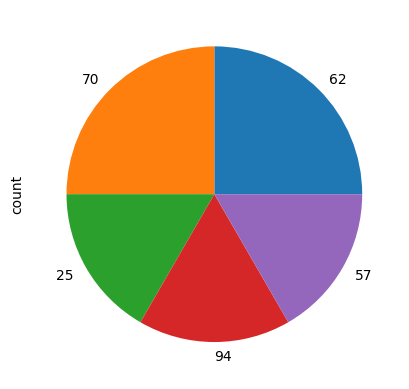

In [314]:
regiment['postTestScore'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

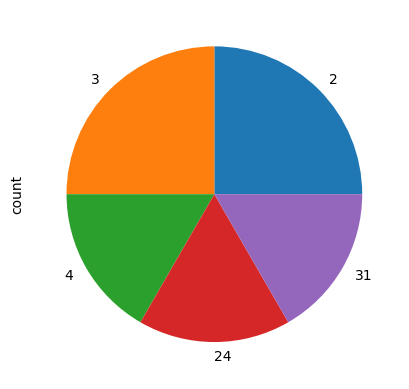

In [315]:
regiment['preTestScore'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

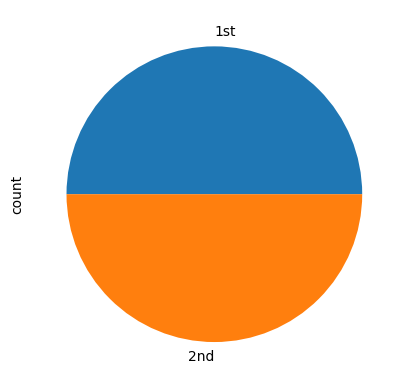

In [316]:
regiment['company'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

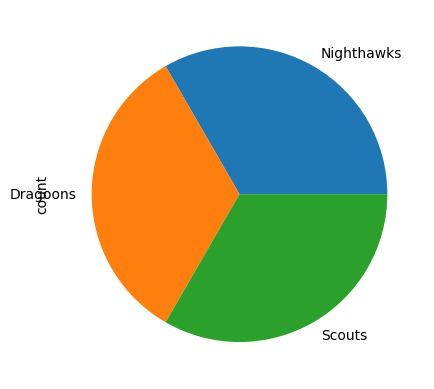

In [317]:
regiment['regiment'].value_counts().plot(kind='pie')

In [318]:
y=regiment[regiment['preTestScore']>25]
y

,regiment,company,name,preTestScore,postTestScore
2,Nighthawks,2nd,Ali,31,57
7,Dragoons,2nd,Sone,31,57


In [319]:
y=regiment[regiment['preTestScore']<25]
y

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70
10,Scouts,2nd,Riani,2,62
11,Scouts,2nd,Ali,3,70


In [320]:
y=regiment[regiment['postTestScore']>25]
y

,regiment,company,name,preTestScore,postTestScore
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70
10,Scouts,2nd,Riani,2,62
11,Scouts,2nd,Ali,3,70


In [321]:
y=regiment[regiment['postTestScore']<25]
y# no one 

,regiment,company,name,preTestScore,postTestScore


In [322]:
y = regiment['preTestScore'].describe()
print(y)

count    12.000000
mean     11.083333
std      12.324833
min       2.000000
25%       2.750000
50%       3.500000
75%      24.000000
max      31.000000
Name: preTestScore, dtype: float64


<Axes: >

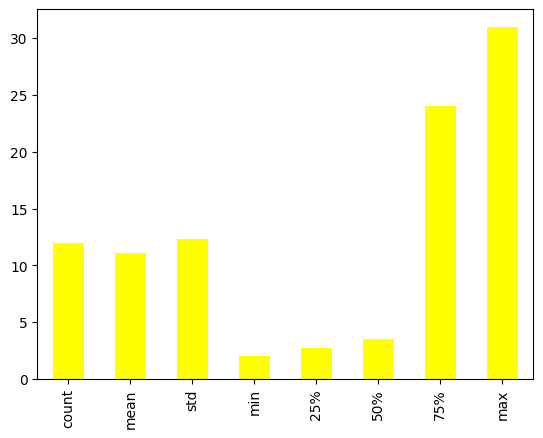

In [323]:
regiment['preTestScore'].describe().plot(kind='bar',color='yellow')

<Axes: ylabel='Density'>

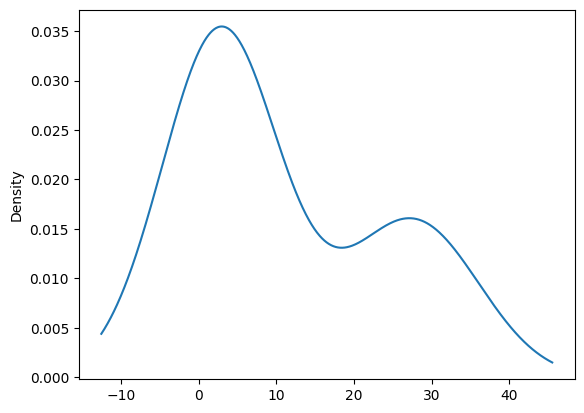

In [324]:
regiment['preTestScore'].plot(kind='kde') 

In [325]:
y = regiment['postTestScore'].describe()
print(y)

count    12.000000
mean     62.333333
std      21.376850
min      25.000000
25%      57.000000
50%      62.000000
75%      70.000000
max      94.000000
Name: postTestScore, dtype: float64


<Axes: >

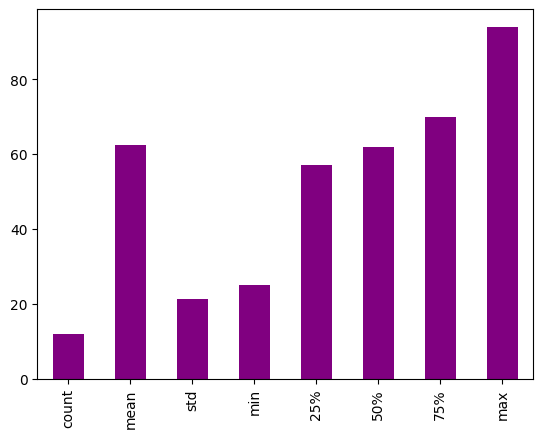

In [326]:
regiment['postTestScore'].describe().plot(kind='bar',color='purple')

<Axes: ylabel='Density'>

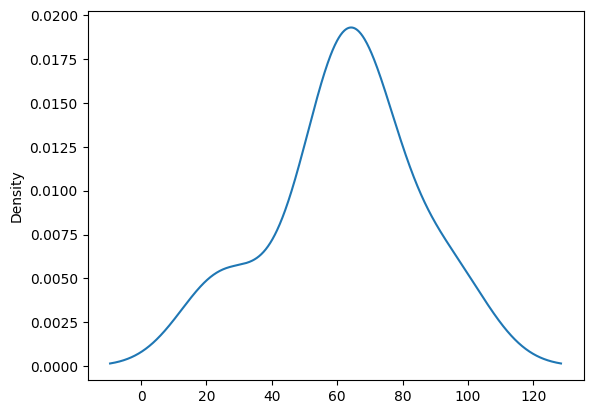

In [327]:
regiment['postTestScore'].plot(kind='kde') 

In [328]:
y = regiment['name'].describe()
print(y)

count      12
unique     11
top       Ali
freq        2
Name: name, dtype: object


In [329]:
y = regiment['company'].describe()
print(y)

count      12
unique      2
top       1st
freq        6
Name: company, dtype: object


In [330]:
y = regiment['regiment'].describe()
print(y)

count             12
unique             3
top       Nighthawks
freq               4
Name: regiment, dtype: object


<Axes: >

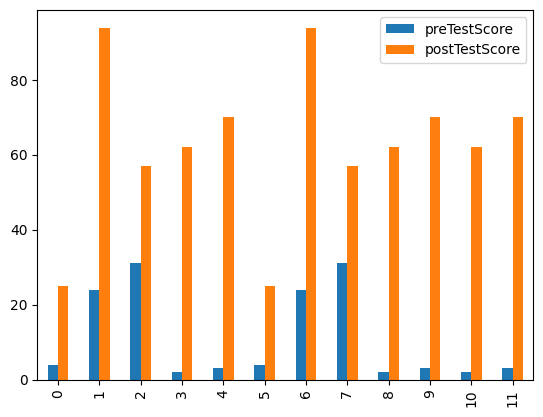

In [331]:
regiment.plot(kind='bar')

<Axes: ylabel='Density'>

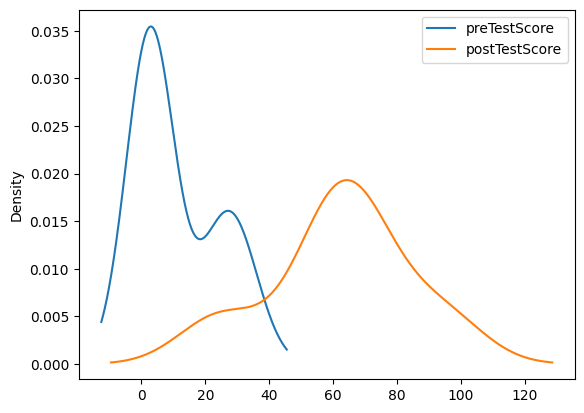

In [392]:
regiment.plot(kind='kde')